<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab09/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Arquiteturas complexas de Redes Neurais Convolucionais 
  - Aprendizagem por transferência
  - Praticar a classificação de objeto usando framework TensorFlow
  

## Arquitetura de Redes Neurais Convolucionais

Existem diversas arquitetura de CNN, cada rede com suas próprias características, principalmente para visão computacional. Mas todas terão em comum camadas de convolução e maxpooling, dropout e algumas coisas a mais...


### Por que utilizar uma arquitetura CNN

Utilizar uma arquitetura de CNN possibilita reduzir o tempo de pesquisa com o desenvolvimento de novas arquiteturas uma vez que essas arquiteturas já foram sistematicamente revisadas.



### Exemplos de arquiteturas:

`LeNET`: Desenvolvida em 1998 por Yann LeCun, a LeNet foi pioneira no uso de camadas de convolução com filtros 5x5 e passo 1, além de camadas de agrupamento com filtros 2x2 e passo 2, intercaladas por camadas totalmente conectadas (FC). A ordem das camadas é: CONV-POOL-CONV-POOL-FC-FC. Essa arquitetura teve um papel fundamental no reconhecimento de dígitos manuscritos.

![](https://pt.d2l.ai/_images/lenet.svg)

`AlexNET`: Criada em 2012 por Alex Krizhevsky, Ilya Sutskever e Geoffrey Hinton, a AlexNet é uma arquitetura mais avançada que a LeNet. Possui cinco camadas convolucionais seguidas de três camadas FC, e emprega a função de ativação ReLU. Vencedora da competição ImageNet de 2012, marcou o início da popularização das redes neurais convolucionais profundas.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*pJ3o_2zTTNnixhKH.png)

`VGG`: A arquitetura VGG, concebida em 2014 pelo Visual Geometry Group da Universidade de Oxford, propôs o uso de filtros menores (3x3) em redes mais profundas, com no mínimo 16 camadas convolucionais e maxpooling com filtros 2x2. Apesar de os filtros menores gerarem menos parâmetros, as camadas FC e as convoluções iniciais demandavam grande quantidade de memória RAM, resultando em uma rede pesada.

![](https://production-media.paperswithcode.com/methods/vgg_7mT4DML.png)

`GoogleNET`: Paralelamente à VGG, em 2014, pesquisadores do Google desenvolveram a GoogleNet, que introduziu o módulo Inception como elemento fundamental. Com nove módulos Inception em sequência, a arquitetura utiliza convoluções 3x3 e 5x5 precedidas por convoluções 1x1 para diminuir o custo computacional. A GoogleNet foi projetada para ser eficiente em termos de recursos e venceu a competição ImageNet de 2014.

![](https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png)


`ResNET`: A rede residual, proposta em 2015 por Kaiming He e colaboradores, tem como característica principal a inclusão de conexões residuais (curto-circuitos) a cada duas convoluções, adicionando um resultado anterior ao resultado futuro. Isso permite treinar redes mais profundas sem problemas de degradação do desempenho. ResNets com 50, 101 e 152 camadas utilizam blocos residuais com "bottleneck", que consistem em duas convoluções 3x3 intercaladas por convoluções 1x1, diminuindo o custo computacional.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*9LqUp7XyEx1QNc6A.png)

`MobileNet`: Proposta em 2017, é uma arquitetura otimizada para dispositivos móveis e aplicativos com limitações de recursos computacionais. Utiliza convoluções separáveis por profundidade para reduzir o número de parâmetros e o consumo de memória.

`EfficientNet`: Proposta em 2019, é uma família de redes neurais convolucionais que busca melhorar a eficiência em termos de recursos computacionais e desempenho, através do ajuste coordenado da largura, profundidade e resolução das redes.

`InceptionV3`: Uma evolução do GoogleNet, a InceptionV3 é uma arquitetura desenvolvida em 2015 que aprimora o módulo Inception e implementa técnicas de normalização em lotes. Essa arquitetura alcança um desempenho superior com menos parâmetros e menor custo computacional.

`DenseNet`: Proposta em 2016, a DenseNet é uma arquitetura que introduz conexões densas entre as camadas. Cada camada recebe as características de todas as camadas anteriores, o que melhora o fluxo de informações e gradientes durante o treinamento. Isso permite a construção de redes mais profundas e eficientes.

`YOLO` (You Only Look Once): É uma arquitetura de rede neural focada em detecção de objetos em tempo real. Proposta em 2016, a YOLO divide a imagem em regiões e prevê, de uma só vez, as probabilidades de classes e as coordenadas das caixas delimitadoras. A YOLO é conhecida por sua velocidade e capacidade de detectar objetos em tempo real.

`Transformer`: Embora não seja uma arquitetura de rede neural convolucional, o Transformer, proposto em 2017, é uma arquitetura de rede neural notável para processamento de linguagem natural e outras tarefas sequenciais. O Transformer introduziu o conceito de atenção auto-regressiva, que permite que a rede aprenda relacionamentos complexos entre as entradas, e tem sido a base para modelos de linguagem de última geração, como BERT e GPT.


Parace que são muitas, mas essas são apenas algumas arquiteturas de redes neurais desenvolvidas nos últimos anos. Dependendo da aplicação e das restrições de recursos, você pode encontrar uma arquitetura adequada às suas necessidades específicas.

### Modelos de CNN pré-treinados

O treinamento de uma boa CNN não é simples, além de muitos dados (milhares de imagens) e muito tempo de processamento.

Mas usar essas redes é super super facil!! 

Vamos usar o VGG16 para fazer a classificação de uma imagem.

Recomendo dar uma olhada na documentação oficial do Keras:  [https://keras.io/api/applications/](https://keras.io/api/applications/)


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image


## importa o modelo da VGG16 pré-treinado
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions



In [2]:
# Carrega o modelo VGG16 pré-treinado com ImageNet:
model = VGG16()


553467096/553467096 [==============================] - 24s 0us/step


In [18]:
# Carrega uma imagem e prepara para ser predita pela VGG16

## teste 1
!wget https://images.tcdn.com.br/img/img_prod/777105/bicicleta_29_hope_21_velocidades_shimano_freios_disco_tamanho_17_12475_1_ac0b7c63eee851b87bcc9832033c9826.jpg -O /content/bike.jpg
img_path = 'bike.jpg'

# teste 2
#!wget https://liberal.com.br/wp-content/uploads/2019/11/buraco-rua-dos-anturios.jpg -O /content/buraco.jpg
#img_path = 'buraco.jpg'


# teste 3
#img_path = 'COLOQUE_UMA_IMAGEM.jpg'


img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print("A imagem é carregada e transformada de {}, para {}".format(img.size,x.shape))

--2023-05-02 11:35:17--  https://images.tcdn.com.br/img/img_prod/777105/bicicleta_29_hope_21_velocidades_shimano_freios_disco_tamanho_17_12475_1_ac0b7c63eee851b87bcc9832033c9826.jpg
Resolving images.tcdn.com.br (images.tcdn.com.br)... 152.199.40.152
Connecting to images.tcdn.com.br (images.tcdn.com.br)|152.199.40.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286478 (280K) [image/jpeg]
Saving to: ‘/content/bike.jpg’

/content/bike.jpg   100%[===================>] 279.76K  --.-KB/s    in 0.005s  

2023-05-02 11:35:18 (57.9 MB/s) - ‘/content/bike.jpg’ saved [286478/286478]

A imagem é carregada e transformada de (224, 224), para (1, 224, 224, 3)


In [19]:
## faz a predição da imagem

preds = model.predict(x)


1/1 [==============================] - 0s 21ms/step


In [20]:
decoded_preds = decode_predictions(preds)[0]

for i, (imagenet_id, label, score) in enumerate(decoded_preds):
    print(f"{i+1}. {label}: {score * 100:.2f}%")


1. mountain_bike: 81.59%
2. alp: 3.85%
3. crash_helmet: 1.89%
4. bicycle-built-for-two: 1.80%
5. tricycle: 1.75%


## Desafio 1

Agora avalie outras arquiteturas de redes neurais disponíveis no Keras, como ResNet50, InceptionV3, MobileNet e EfficientNet. 

Basta substituir a importação e a função de carregamento do modelo conforme necessário. Por exemplo, para usar a ResNet50:

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')


#### seu código aqui....




102967424/102967424 [==============================] - 5s 0us/step


##Introdução ao Transfer Learning com redes pré-treinadas

Excelente! Agora que já sabemos como utilizar uma rede pré-treinada, vamos explorar uma técnica poderosa chamada Transfer Learning (Aprendizagem por Transferência). Essa abordagem nos permite tirar proveito das arquiteturas de redes neurais existentes e treiná-las para classificar objetos personalizados ou novas categorias de imagens.

O Transfer Learning é uma técnica em que um modelo de aprendizado profundo, treinado previamente em um conjunto de dados maior e mais diversificado, é adaptado para ser aplicado a um novo problema. O conhecimento adquirido pelo modelo original é transferido para o novo problema, permitindo um treinamento mais rápido e, muitas vezes, um desempenho melhor do que treinar uma rede neural do zero.

A ideia por trás do Transfer Learning é que as redes neurais pré-treinadas, como VGG, ResNet e Inception, já aprenderam a ``extrair características`` importantes das imagens em seus primeiros estágios. Essas características podem ser comuns a muitos problemas de classificação de imagens, como detecção de bordas, texturas e padrões. Ao aproveitar esse conhecimento prévio, podemos nos concentrar no treinamento das últimas camadas do modelo, que são responsáveis por aprender características específicas do novo problema.

Ao utilizar o Transfer Learning, podemos economizar tempo e recursos computacionais, além de obter melhores resultados do que treinar uma rede do zero para um conjunto de dados menor e específico. Portanto, é uma técnica amplamente utilizada em aplicações práticas de aprendizado profundo e processamento de imagens.



## Combinando a rede pré-treinada com um classificador MLP

Ao aplicar o Transfer Learning, nossa rede convolucional será composta por duas partes principais: o extrator de características e o classificador. O extrator de características será baseado em uma rede pré-treinada, como VGG16, ResNet50 ou InceptionV3. Essa parte da rede já aprendeu a extrair características relevantes de imagens, como bordas, texturas e padrões, durante o treinamento em um grande conjunto de dados, como o ImageNet.

Em seguida, adicionaremos um classificador MLP (Multilayer Perceptron) personalizado para resolver o nosso problema específico de classificação de imagens. Esse classificador será responsável por aprender as características específicas do novo conjunto de dados e classificar as imagens nas categorias desejadas.

Dessa forma, a rede ajustada combina o poder das redes pré-treinadas, que já aprenderam a extrair características gerais de imagens, com um classificador personalizado que aprenderá a distinguir as categorias específicas do nosso problema. Como mostra a figura abaixo:

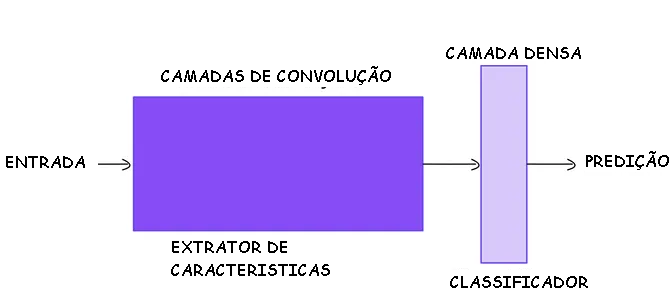

Agora que entendemos os conceitos básicos de Transfer Learning, podemos prosseguir com os passos para aplicar o Transfer Learning e adaptar a rede pré-treinada ao nosso problema de classificação de imagens. 

##Passo a passo para aplicar Transfer Learning

1. Escolha uma rede pré-treinada: Selecione uma rede neural pré-treinada disponível no Keras (por exemplo, VGG16, ResNet50, InceptionV3) com base nas características e requisitos do seu problema. Cada arquitetura tem suas próprias vantagens e desvantagens, portanto, escolha aquela que melhor se adapta às suas necessidades.

2. Remova a camada de classificação: Carregue a rede neural pré-treinada sem a camada de classificação final. Isso pode ser feito usando o argumento include_top=False ao carregar o modelo no Keras. Isso permitirá que você adicione suas próprias camadas personalizadas para classificar as novas categorias.

3. Adicione camadas personalizadas: Adicione camadas específicas para o seu problema de classificação. Normalmente, isso inclui uma camada de GlobalAveragePooling2D, seguida por uma camada densa com uma função de ativação softmax e o número de neuronios igual ao número de classes do novo problema.

4. Congele as camadas pré-treinadas: É uma boa prática congelar as camadas pré-treinadas da rede neural, especialmente durante as primeiras épocas do treinamento. Isso evitará que os pesos dessas camadas sejam atualizados e preservará o conhecimento prévio que elas possuem. No Keras, você pode fazer isso com o modelxxx.trainable = False

5. Pré-processamento dos dados: Prepare os dados de acordo com a rede pré-treinada escolhida. Isso inclui redimensionar as imagens, normalizar os valores dos pixels e codificar as etiquetas das categorias. Lembre-se de aplicar as mesmas transformações usadas no conjunto de dados original da rede pré-treinada.

6. Treine o modelo: Treine o modelo ajustado no seu conjunto de dados. Durante as primeiras épocas, com as camadas pré-treinadas congeladas, o modelo aprenderá as características específicas do novo problema. 

7. Avalie e otimize: Avalie o desempenho do modelo ajustado em um conjunto de teste e otimize os hiperparâmetros conforme necessário. Você pode experimentar diferentes arquiteturas de redes neurais, taxas de aprendizado, otimizadores e outros hiperparâmetros para encontrar a melhor configuração para o seu problema.

## Aplicando transfer learning em um dataset já preparado pelo tensorflow

Vamos usar o dataset `cats_vs_dogs` que é disponibilizado pelo proprio tensorflow, desta forma focamos apenas no entendimento da tecnica de transfer learning e menos em preprocessamento e criação de dados. nas proximas aulas vamos criar nosso proprio dataset...


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuração dos diretórios e parâmetros do conjunto de dados
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_extract/cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

batch_size = 32
image_size = (224, 224)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


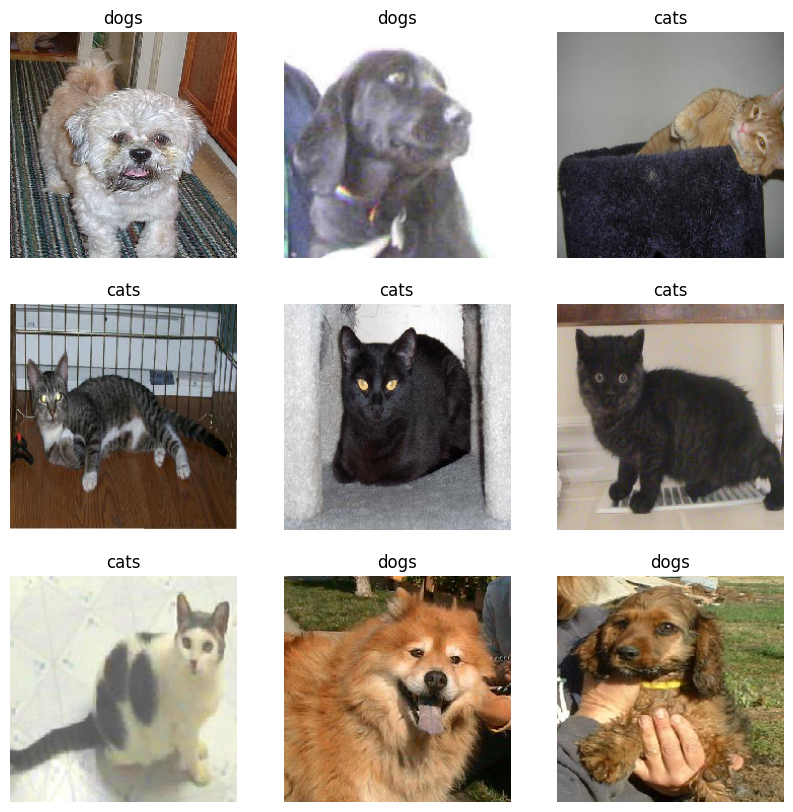

In [43]:
# Função para exibir algumas imagens do conjunto de dados
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i, (img, label) in enumerate(zip(images, labels)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis("off")
    plt.show()

# Carregar imagens e rótulos do conjunto de dados de treinamento
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Carregar imagens e rótulos do conjunto de dados de validação
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Carregar algumas imagens e rótulos do conjunto de dados de treinamento
sample_datagen = ImageDataGenerator(rescale=1./255)
sample_generator = sample_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=9,
    class_mode='binary'
)

sample_images, sample_labels = next(sample_generator)
class_names = {v: k for k, v in sample_generator.class_indices.items()}
plot_images(sample_images, sample_labels, class_names)

### Escolhendo um modelo pré-treinado

A `MobileNet V2` desenvolvido no Google e foi treinado com `1,4 milhão de imagens` e possui `1000 classes diferentes` com pesos predeterminados do imagenet (Googles dataset).

Carregue a rede neural pré-treinada sem a camada de classificação final. Isso pode ser feito usando o argumento ``include_top=False``


In [87]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Cria o base_model referente a MobileNet V2, sem a camada de classificação
base_model = MobileNetV2(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

In [ ]:
base_model.summary()

In [90]:
#Congela a base_model para não atuaizar os pesos quando treinar.

base_model.trainable = False

In [ ]:
base_model.summary()

### Adicionando um Classificador

In [92]:
#Camada  para gerar um vetor de 1280 elementos 
global_average_layer = layers.GlobalAveragePooling2D()

# O Classificador para gato cachorro com 1 neuronio 
saida_layer = layers.Dense(1, activation='sigmoid')

In [93]:
model = tf.keras.Sequential([
  base_model,   #### cnn mobilenet
  global_average_layer, ###flatten
  saida_layer ### especiallista
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


Pronto! Já criamos a nossa rede para classificação. Agora podemos treinar nossa rede e testar.

## Desafio 2 

Vamos entender o que acabamos de fazer. Avalie a quantidade de parametros total, treinaveis e não treinaveis. O que foi identificado?



#### sua resposta aqui.....


.

### Treinamento do modelo

In [94]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
#Avaliação do modelo antes de treiná-lo com novas imagens
validation_steps=20

loss0,accuracy0 = model.evaluate(train_generator, steps = validation_steps)

20/20 [==============================] - 5s 178ms/step - loss: 0.8159 - accuracy: 0.5125


In [62]:
# Treinamento da nova CNN

history = model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
63/63 [==============================] - 19s 232ms/step - loss: 0.6893 - accuracy: 0.6200 - val_loss: 0.5397 - val_accuracy: 0.7490
Epoch 2/5
63/63 [==============================] - 13s 205ms/step - loss: 0.4975 - accuracy: 0.7575 - val_loss: 0.4721 - val_accuracy: 0.7780
Epoch 3/5
63/63 [==============================] - 13s 206ms/step - loss: 0.4484 - accuracy: 0.7880 - val_loss: 0.4458 - val_accuracy: 0.7980
Epoch 4/5
63/63 [==============================] - 13s 202ms/step - loss: 0.4176 - accuracy: 0.8005 - val_loss: 0.4327 - val_accuracy: 0.8020
Epoch 5/5
63/63 [==============================] - 13s 204ms/step - loss: 0.3953 - accuracy: 0.8235 - val_loss: 0.4159 - val_accuracy: 0.8180


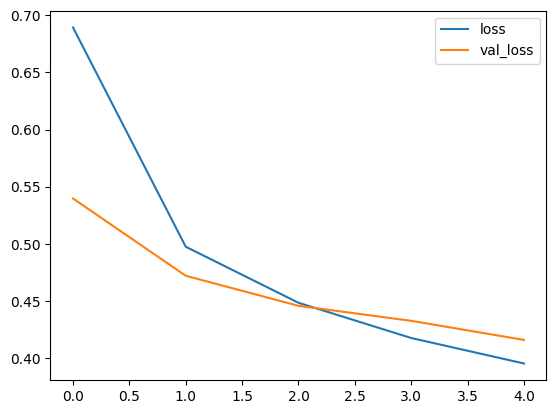

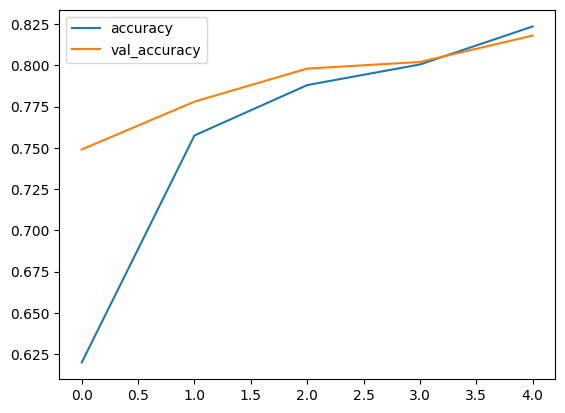

In [64]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy", "val_accuracy"]].plot();

### Fazendo predições

In [67]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_cat_or_dog(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    
    if prediction[0][0] < 0.5:
        return "gatinhooooo"
    else:
        return "cachorrinho"

# Teste a função de previsão com uma imagem

!wget https://uploads.metropoles.com/wp-content/uploads/2022/07/21154234/como-identificar-que-um-cachorro-esta-sendo-vitima-de-maus-tratos-1.jpg -O /content/cachorro.jpg
img_path = "cachorro.jpg"
result = predict_cat_or_dog(img_path)
print("Essa foto é de um ", result)

--2023-05-02 12:32:46--  https://uploads.metropoles.com/wp-content/uploads/2022/07/21154234/como-identificar-que-um-cachorro-esta-sendo-vitima-de-maus-tratos-1.jpg
Resolving uploads.metropoles.com (uploads.metropoles.com)... 179.191.175.68, 179.191.175.67, 179.191.177.66, ...
Connecting to uploads.metropoles.com (uploads.metropoles.com)|179.191.175.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47409 (46K) [image/jpeg]
Saving to: ‘/content/cachorro.jpg’

/content/cachorro.j 100%[===================>]  46.30K   200KB/s    in 0.2s    

2023-05-02 12:32:47 (200 KB/s) - ‘/content/cachorro.jpg’ saved [47409/47409]

1/1 [==============================] - 0s 23ms/step
Essa foto é de um  cachorrinho


### Salvando o modelo da rede treinada 

Agora que já temos um modelo treinado e ajustado para resolver o problema especifico que temos, podemos salver a arquitetura e os pesos em um arquivo com extensão .h5

para usar esta rede, basta carregar o arquivo.h5


In [69]:
# Salvando a rede 
model.save("dogs_vs_cats.h5")

#Carregando uma rede .h5
new_model = models.load_model('dogs_vs_cats.h5')

## Desafio 3

Aplicar o Transfer Learning usando a rede pré-treinada ResNet50 e o conjunto de dados CIFAR-10, que possui 10 classes de objetos.

In [ ]:
### Seu código aqui....





